<a href="https://colab.research.google.com/github/EngrIBGIT/Projects_Deep_Learning_PyTorch/blob/main/Project_Deep_Learning_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Fundamentals

## Resources
`Notebook:` [Pytorch](https://www.learnpytorch.io/00_pytorch_fundamentals/)

`Guided Learning:` [Udacity Deep Learning Pytorch](https://www.udacity.com/course/deep-learning-pytorch--ud188?irclickid=3u50vqRulxyPWoN36uVfJR3zUkFSahxmE2bO040&irgwc=1&utm_source=affiliate&utm_medium=&aff=259799&utm_term=&utm_campaign=_gtc_www_classcentral_com_&utm_content=&adid=788805)

[Deep Learning: CS 182 Spring 2021](https://www.youtube.com/playlist?list=PL_iWQOsE6TfVmKkQHucjPAoRtIJYt8a5A)


In [ ]:
!nvidia-smi

Sat Oct 12 07:54:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(torch.__version__)

2.4.1+cu121


## Introduction to Tensors: Tensors are the main building blocks of pytorch

#### Creating Tensors; Pytorch tensors are created using `torch.Tensor()` = [Create Tensor](https://pytorch.org/docs/stable/tensors.html)

In [ ]:
# Scalar: A way to create tensor in pytorch, has no dimensions its a single number

scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
# Get tensor as python int
scalar.item()

7

In [ ]:
# vector; Typically has more than one dimention

vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# MATRIX:
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX.shape

torch.Size([2, 2])

In [ ]:
MATRIX[1]

tensor([ 9, 10])

In [ ]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

In [ ]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

__Random Tensors:__

*Why random tensors?*

`Random tensors are important because many neural networks learn by starting with tensor full of numbers and then adjust those random numbers to better represent data`

Start with random numbers --> Look at data --> update random numbers --> Look at data --> update random numbers -->

[Torch random tensors](https://pytorch.org/docs/stable/generated/torch.rand.html)

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.9947, 0.3848, 0.2065, 0.3011],
        [0.5255, 0.5765, 0.2627, 0.1060],
        [0.6364, 0.1906, 0.4166, 0.1845]])

In [ ]:
random_tensor.ndim

2

In [ ]:
random_tensor2 = torch.rand(2, 5, 6)
random_tensor2

tensor([[[0.9615, 0.8908, 0.9544, 0.7554, 0.1772, 0.9541],
         [0.2976, 0.2715, 0.8954, 0.8376, 0.5362, 0.8415],
         [0.6665, 0.6517, 0.4787, 0.5595, 0.1230, 0.6370],
         [0.1287, 0.2177, 0.1395, 0.9264, 0.5076, 0.3771],
         [0.8540, 0.4544, 0.8534, 0.3615, 0.9075, 0.4053]],

        [[0.7199, 0.8272, 0.4521, 0.5846, 0.0464, 0.9737],
         [0.6726, 0.7872, 0.9174, 0.5042, 0.5266, 0.5211],
         [0.1532, 0.5253, 0.3544, 0.2512, 0.6396, 0.9384],
         [0.3145, 0.5093, 0.0471, 0.3517, 0.1611, 0.9349],
         [0.0481, 0.2630, 0.8760, 0.1037, 0.6453, 0.1794]]])

In [ ]:
random_tensor2.ndim

3

In [ ]:
# Create random tensor with similar shape to an image tensor

random_image_size_tensor = torch.rand(size=(224, 224, 3)) # height, width, color channels (R, G, B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [ ]:
torch.rand(size=(3, 3))

tensor([[0.4235, 0.9228, 0.5295],
        [0.2574, 0.4272, 0.1430],
        [0.2278, 0.7029, 0.0797]])

### Zeros and ones

In [ ]:
# Tensors of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Tensors of all ones
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
ones.dtype

torch.float32

### Range of tensors

In [ ]:
# Torch.range

In [ ]:
torch.range(0, 10)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
torch.arange(1, 11)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
one = torch.arange(start=1, end=11, step=1)
one

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
thousand = torch.arange(start=0, end=1000, step=77)
thousand

tensor([  0,  77, 154, 231, 308, 385, 462, 539, 616, 693, 770, 847, 924])

In [ ]:
# Tensors like

ten_zeros = torch.zeros_like(input=one)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

**Note:** Tensor datatypes among one of the 3 big errors to come across with Pytorch deep learning:
 1. Tensors not in right datatype
 2. Tensors not in right shape
 3. Tensors not on right device

 [Precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science))

In [ ]:
# FLoat 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # what datatype is the tensor (e.g. float32 or float16)
                               device = None, # What device is tensor on ?e.g cpu, cuda
                               requires_grad=False) # whether or not to track gradients with this tensors operations
float_32_tensor
float_32_tensor

tensor([3., 6., 9.])

In [ ]:
float_32_tensor.dtype

torch.float32

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_64_tensor = torch.tensor([3, 6, 9], dtype=torch.long)
int_64_tensor

tensor([3, 6, 9])

In [ ]:
int_64_tensor * int_32_tensor

tensor([ 9, 36, 81])

In [ ]:
int_64 = torch.tensor([3, 6, 9], dtype=torch.int64)
int_64

tensor([3, 6, 9])

### Get information  from tensors: How to (tensor attributes)

1. Tensors not in right datatype - to get datatype from a tensor, can use `tensor.dtype`
2. Tensors not in right shape - to get shape from a tensor, can use `tensor.shape`
3. Tensors not on right device - to get device from a tensor, can use `tensor.device`

In [ ]:
# Tensor:
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.4331, 0.1416, 0.9337, 0.6145],
        [0.8676, 0.9477, 0.7489, 0.4118],
        [0.4333, 0.5643, 0.0648, 0.9509]])

In [ ]:
# Details on some_tensor
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.4331, 0.1416, 0.9337, 0.6145],
        [0.8676, 0.9477, 0.7489, 0.4118],
        [0.4333, 0.5643, 0.0648, 0.9509]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


### Manipulating Tensors (Tensor Operations)

Tensor operations include:
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [ ]:
# Additions
tensoradd = torch.tensor([1, 2, 3]) + 10
tensoradd

tensor([11, 12, 13])

In [ ]:
# Subtaction
tensorsubract = torch.tensor([1, 2, 3]) - 10
tensorsubract

tensor([-9, -8, -7])

In [ ]:
# Multiplication
tensormultiply = torch.tensor([1, 2, 3]) * 10
tensormultiply

tensor([10, 20, 30])

In [ ]:
# Pytroch inbuilt functions
tensormultiply = torch.mul(torch.tensor([1, 2, 3]), 10)
tensormultiply

tensor([10, 20, 30])

from re import M
### MATRIX MULTIPLICATION:

Two main ways  to perform multiplication in neural networks and deep learning:
1. Element-wise multiplication
2. Matrix multiplication (dot product)

More information on multiplying matrices - [multiplying matrices](https://www.mathsisfun.com/algebra/matrix-multiplying.html)

Two main rules matrix multiplication must satisfy
1. **Inner dimensions** must match:
* `(3,2) @ (3,2)` wont work
* `(2,3) @ (3,2)` will work
* `(3,2) @ (2,3)` will work

2. The resulting matrix has shape of **outer dimensions**
* `(2, 3) @ (3, 2)` --> (2, 2)
* `(3, 2) @ (2, 3)` --> (3, 3)


In [ ]:
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

In [ ]:
# Element wise multiplication
print(tensor, "*", tensor) #, "=", tensor * tensor)
print(f"Equals: {tensor * tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [ ]:
# Matrix Multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
# Matrix multiplication by Hand
1*1 + 2*2 + 3*3

14

In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 2.37 ms, sys: 64 µs, total: 2.44 ms
Wall time: 2.53 ms


In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 83 µs, sys: 0 ns, total: 83 µs
Wall time: 86.8 µs


tensor(14)

In [ ]:
# Shapes for Matrix Multiplication
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

#torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul (it's an alias for writing less code)
torch.matmul(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

To fix shape issues, we can manipulate the shape of one of our tensors using a **transpose**.
A **transpose** switches the axes or dimensions of a given tensor.


In [ ]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [ ]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [ ]:
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

In [ ]:
# The matrix multiplication works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T}.shape")
print(f"Multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensions must match")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = tensor([[ 7,  8,  9],
        [10, 11, 12]]).shape
Multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensions must match
Output:

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


## Find min, max, mean, sum etc (Tensor Aggregation of certain tensor values)

In [ ]:
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# min.
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
# max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
# mean
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean() # requires a tensor of float 32 datatype to work

(tensor(45.), tensor(45.))

In [ ]:
# sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

# Positional min and max(Index at which min or max operates)
use the arg min and arg max

In [ ]:
# Find position in tensor that has the minimium value argmin() --> returns index position of target tensor where the minimum value occurs
x.argmin()

tensor(0)

In [ ]:
x[0]

tensor(0)

In [ ]:
x.argmax()

tensor(9)

In [ ]:
x[9]

tensor(90)

# Reshaping , stacking, squeezing and unsqueezing tensors (To change shape of tensor)
* Reshaping - reshapes an input tensor to a defined shape
* View - Return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - Return a view of the input with dimensions permuted (swapped) in a certain way

In [ ]:
# Create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Reshape -- Add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
x_reshaped = x.reshape(9, 1)
x_reshaped, x_reshaped.shape

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

In [ ]:
# Extra Dimension
x_reshaped = x.reshape(3, 3)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

In [ ]:
# Change view
z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Changing z changes x (because a view of a tensor shares the same memory as the original input)

z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other

x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

torch.squeeze() = removes all single dimensions from a target tensor

torch.unsqueeze() = adds a single dimension to a target tensor at a specific dim

torch.permute() = rearranges the dimensions of a target tensor in a specified order

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra  dimensions from x_shaped (at dim 0)
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
Previous shape: torch.Size([3, 3])

New tensor: tensor([[5., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
New shape: torch.Size([3, 3])


In [ ]:
# Add extra dimension with unsqueeze
x_reshaped

tensor([[5., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
squeeze = torch.tensor([[1, 2, 3]])
squeeze

tensor([[1, 2, 3]])

In [ ]:
unsqueeze = torch.tensor([1, 2, 3])

# PyTorch tensors and Numpy

Numpy is a popular scientific Python numerical computing library.
PyTorch has functionality to interact with it.

# Numpy array to tensor
Data in Numpy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
# Tensor to Numpy array -> `torch.Tensor.numpy()`
PyTorch tensor --> Numpy array -> `torch.Tensor.numpy()`
PyTorch reflects Numpy's default datatype of `float64` unless specified otherwise.
pytorch tensors run on the CPU, numpy arrays run on the CPU

In [ ]:
#Numpy array to tensor

import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
array.dtype

dtype('float64')

In [ ]:
tensor.dtype

torch.float64

In [ ]:
torch.arange(1.0, 8.0).dtype

torch.float32

In [ ]:
tensor = torch(1.0, 8.0)
tensor = torch.from_numpy(array)  # warning: when converting from numpy -> pytorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise
array, tensor

In [ ]:
# Change the value of array, what will this do to `tensor`? Does not change
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# Tensor to Numpy

tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
numpy_tensor.dtype

dtype('float32')

In [ ]:
# Change the tensor, what happens to `numpy_tensor`?
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

Reproducibility (trying to take the random out of random):

`How neural network learns is start with neural numbers to try and make them better represenations of the data
update again again again`

To reduce randomness in neural networks and PyTorch comes the concept of a **random seed**.

Essentially what the random seed does is "flavour" the randomness.


Reproducibility documents:

[Pytorch document on Reproducibility](https://pytorch.org/docs/stable/notes/randomness.html)

[wikipedia.randomseed](https://en.wikipedia.org/wiki/Random_seed)


In [ ]:
torch.rand(3, 3)

tensor([[0.1446, 0.5540, 0.5761],
        [0.4942, 0.1887, 0.6807],
        [0.2447, 0.7174, 0.7434]])

In [ ]:
import torch

# create two random tensors

random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.3668, 0.3936, 0.7239, 0.1595],
        [0.7996, 0.7480, 0.5309, 0.5998],
        [0.0404, 0.6763, 0.2149, 0.7108]])
tensor([[0.6421, 0.9835, 0.0516, 0.2561],
        [0.7190, 0.0435, 0.4283, 0.2516],
        [0.6680, 0.6409, 0.4619, 0.2763]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Make some random reproducible tensors

import torch

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Rnnning tensors and PyTorch objects on the GPUs is faster

GPUs = faster computation on numbers,

Thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make everything hunky dory(good)

# Getting a GPU

!nvidia-smi

1. Easiest - Use google colab for a free GPU (options to upgrade as well) downside is using locally.

2. Use your own GPU = takes a little bit of setup and requires the investment of purchasing a GPU:

    what option to get: [which-gpu-for-deep-learning](https://timdettmers.com/2020/09/07/which-gpu-for-deep-learning/)
    
3. Use cloud computing - `GCP, AWS, Azure`, these services allow you to rent computers on the cloud and access them


For 2, 3 PyTorch + GPU drivers (CUDA) takes a little bit of setting up, to do this, refer to: [PyTorch setup Documentation](https://pytorch.org/get-started/locally/)

In [ ]:
# 1. Check GPU Access
!nvidia-smi

Sat Oct 12 08:32:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# 2. Check for GPU access with PyTorch
import torch
invidia = torch.cuda.is_available()
invidia

True

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code:

[best-practices](https://pytorch.org/docs/stable/notes/cuda.html#best-practices)

E.g. run on GPU if available, else default to CPU

In [ ]:
#3. Setup device agnostic code (Very important in pytorch)

# Set Device Variable (set to use cuda)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#4. Count Number of devices (For upgraded use, when running large models, to run different models on diff GPU's)
torch.cuda.device_count()

1

## Putting tensors and models on the GPU
Reason is because using a GPU results in faster computations.

In [ ]:
# Create a tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

## Moving tensors back to the CPU

In [ ]:
# If tensor is on GPU cant transform it to numpy

tensor_on_gpu.numpy()

In [ ]:
# To fix GPU tensor with NumPy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [ ]:
import torch

In [ ]:
Documentation reading - A big part of deep learning is knowing what the datatypes and shapes of your data are.
If the tensors are not the right datatype - to get datatype from a tensor, can use tensor.dtype
If the tensors are not the right shape - to get shape from a tensor, can use tensor.shape
If the tensors are not on the right device - to get device from a tensor, can use tensor.device

In [ ]:
# Create a random tensor with shape (7, 7)
torch.rand(7, 7)

tensor([[0.1994, 0.5472, 0.0062, 0.9516, 0.0753, 0.8860, 0.5832],
        [0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423, 0.6343],
        [0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886, 0.5895],
        [0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440],
        [0.7071, 0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587],
        [0.6542, 0.3278, 0.6532, 0.3958, 0.9147, 0.2036, 0.2018],
        [0.2018, 0.9497, 0.6666, 0.9811, 0.0874, 0.0041, 0.1088]])

In [ ]:
# Set random seed on GPU to 0
torch.cuda.manual_seed(0)

In [ ]:
# Create two random tensors of shape (3, 3) and send them both to the GPU (you'll need access to a GPU for this).
# Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).

torch.manual_seed(1234) # Call torch.manual_seed directly
torch.rand(3, 3)

tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006],
        [0.0518, 0.4681, 0.6738]])

### Autograd:

Package provide automatic differentiation for all operations on Tensors.
Torch.autograd is an engine for computing the vector-jacobian product. It computes partial derivatives while applying the chain rule.

`Set requires_grad = True:`

In [ ]:
import torch

# requires_grad = True --> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user --> grad_fn is None
print(y)
print(y.grad_fn)

In [ ]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

In [ ]:
z.backward() # dz/dx
print(x.grad)

# A PyTorch Workflow

Exploring an example of a pytorch end to end workflow:

Resources:

- Notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/
- Video: https://www.youtube.com/watch?v=Z_ikDlimN6A
- Code: https://github.com/mrdbourke/pytorch-deep-learning
- Data: https://github.com/mrdbourke/pytorch-deep-learning/tree/main/data
- Exercises: https://github.com/mrdbourke/pytorch-deep-learning/tree/main/exercises
- Discussions: https://github.com/mrdbourke/pytorch-deep-learning/discussions
- PyTorch Forums: https://discuss.pytorch.org/
- PyTorch Documentation: https://pytorch.org/docs/stable/index.html
- PyTorch Official Docs: https://pytorch.org/
- PyTorch Lightning Docs: https://pytorch-lightning.readthedocs.io/en/latest/

In [1]:
Covering = {1: "data (prepare and load)",
            2: "build model",
            3: "Fit model to data (training)",
            4: "Make Predictions and Evaluate model (inference)",
            5: "Save and load model",
            6: "Putting it all together"}

Covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'Fit model to data (training)',
 4: 'Make Predictions and Evaluate model (inference)',
 5: 'Save and load model',
 6: 'Putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

1. Data: prepare and load data

Data can be anything going from images, text to tables on databases.
in the following formats:
Excel spreadsheet
CSV file
Text file
Tensor
DNA
Videos
Audio
Images
etc

Machine Learning is a game of two parts
1. Get data ready (into numerical representations).
2. Build a model to learn patterns in that data

To showcase this, we create some data using: LinearRegeression(y = w*x + b) formula to make a straight line with some known parameters.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets (a very important concept in machine learning)

Create a training and test split of the data

In [4]:
# Train/Test split
train_split = int(0.8 * len(X))
train_split

40

In [5]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train,  y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

Visualizing the data

This is where data visualization comes in.

Visualize the data.

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """plots training data, test and compare predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    # Show the legend
  plt.legend(prop={"size": 14});

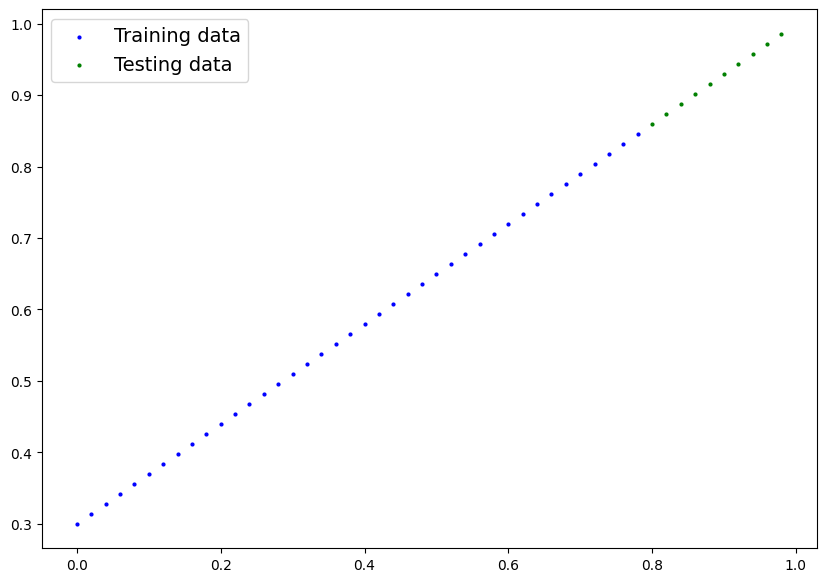

In [8]:
plot_predictions()

## Building a PyTorch model

An exciting moment:
We building classes throughout the course

Resource to guide python classes:
[Real python classes OOP in python](https://realpython.com/python3-object-oriented-programming/)

What the model does:
* Start with random values (weights and bia)
* Look at training data and adjust the random values to better represent the data (i.e. better fit) into the weights and bias used in the formula.

How it works:
1. Gradient descent
2. Update weights
3. Loss
4. Repeat
5. Backpropagation (gradient descent)

Resources:
https://www.youtube.com/watch?v=Z_ikDlimN6A

https://www.youtu.be.com/llg3gGewO5U

In [9]:
# Create a Linear Regression model class

# Containts all building blocks for neural networks
class LinearRegressionModelV1(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks) nn.module in pytorch
  def __init__(self):
    super().__init__()
    # Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to adjust to the ideal weight
                                            requires_grad=True, # can parameter be updated via gradient descent?
                                            dtype=torch.float)) # Pytorch default datatype is float 32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weights * x + self.bias # this is the linear regression formula


import torch
import torch.nn as nn

class LinearRegressionModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True)) #requires_grad=True so they are trainable
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    # Define the forward method
    def forward(self, x):
        # Linear regression formula: y = weight * x + bias
        return self.weights * x + self.bias

PyTorch model building essentials

* torch.nn - contains all the building for computational graphs ( a neural network can be considered a computational graph)
* torch.nn.Parameter - Parameters the model will learn - contains the weights and biases, often used in neural networks, a PyTorch layer from torch.nn will set this
* torch.nn.Module - Base class for all neural networks (PyTorch modules, if sublass, overwrite forward())
* torch.nn.functional - contains activation functions

torch.optim - where the optimers in  PyTorch live, will help with gradient descent

def forward() - defines the computation in the model.

Essential Modules for PyTorch cheatsheet:

https://pytorch.org/tutorials/beginner/ptcheat/.html
https://www.learnpytorch.io/00_pytorch_fundamentals/,
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/00_pytorch_fundamentals_exercises.ipynb
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

Check content of PyTorch model

check whats in the model

check model parameters using `.parameters()`.

In [10]:
# Create a random seed

torch.manual_seed(42)

# Create an instance of model (a subclass of nn.Module)
# model_0 = LinearRegresssionModel() #typo here - class is called LinearRegressionModelV1
model_0 = LinearRegressionModelV1()

# Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List of parameters in the model
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

Make prediction using `torch.inference_mode()`

To check model's predicting power, see how well the model predicts on the `test data`.

when data is passed its going to run through the forward() method.

In [13]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

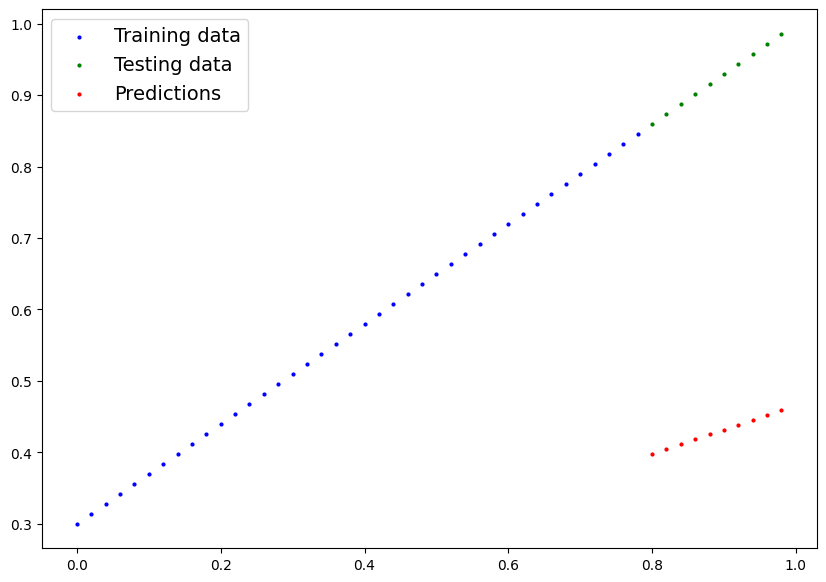

In [15]:
plot_predictions(predictions=y_preds)

Train model

The idea for training is from some unknown parameters to some known parameters or from a poor representation of data to a better representation of the data

How to measure how well the model is performing?

`Use Loss function`: Also called `cost function` or criterian in different areas. A function to measure how wrong the model is predicting on the ideal outputs.

`Optimizer`: Takes into account the loss of a model and adjusts the models parameters (i.e weights and biases) to try and make the loss less. i.e to improve the losss function.

Specifically for pytorch, there is need for :

- training loop
- test loop

- Loss function: https://pytorch.org/docs/stable/nn.html#loss-functions
- Optimizer: https://pytorch.org/docs/stable/optim.html


In [16]:
list(model_0.parameters())

#[Parameter containing:
# tensor([0.3367], requires_grad=True), Parameter containing:
# tensor([0.1288], requires_grad=True)]


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Setup an optimizer = stochastic gradient descent (SGD) - (Takes into account the loss of the model)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter

Which loss function to use? = it will depend on the problem you are trying to solve.  

Which optimizer to use? = it will depend on the problem you are trying to solve. As its problem speciific.

Build a training loop in PyTorch

What is needed in a training loop:
- Loop through the data
- Forward pass : Involves data moving through the model to make predictions also called forward propagation
- Calculate the loss: Compare forward pass predictions to the ground truth labels
- Optimizer zero grad
- Loss backward: Move backwards through the network to calculate the gradients of each parameter of model with respect to the loss.
- Optimizer step: Adjust the parameters by taking a small step in the right direction.

In [19]:
torch.manual_seed(42)

# Set the number of epochs (a hyperparameter)
# An Epoch is one loop through the data... (It is a hypeparameter as its been set)
epochs = 1

# loop through data
for epoch in range(epochs):
  #Set model to training mode
  model_0.train()    # Set model to training mode in PyTorch, require gradients


  # Forward pass: Perform forward pass in the training model
  y_pred = model_0(X_train)

  # Calculate the loss value (difference between model prediction and training values)
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad; Zero optimizer gradients, they accumulate by default
  optimizer.zero_grad()

  # Perform Backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # Step the optimizer (perform gradient descent) step the optimizer
  optimizer.step()  # optimizer changes through the loop

  # Testing
  model_0.eval() # Set model to evaluation mode in PyTorch, no gradients(turn off gradients tracking)

  # Print out model state_dict()
  print(f"\nEpoch: {epoch}\n----------")
  print(f"weight: {model_0.state_dict()['weights']}\nbias: {model_0.state_dict()['bias']}\nloss: {loss}")



Epoch: 0
----------
weight: tensor([0.3406])
bias: tensor([0.1388])
loss: 0.31288138031959534


In [20]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  print(y_preds_new)

tensor([[0.4113],
        [0.4181],
        [0.4249],
        [0.4317],
        [0.4385],
        [0.4453],
        [0.4522],
        [0.4590],
        [0.4658],
        [0.4726]])


In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

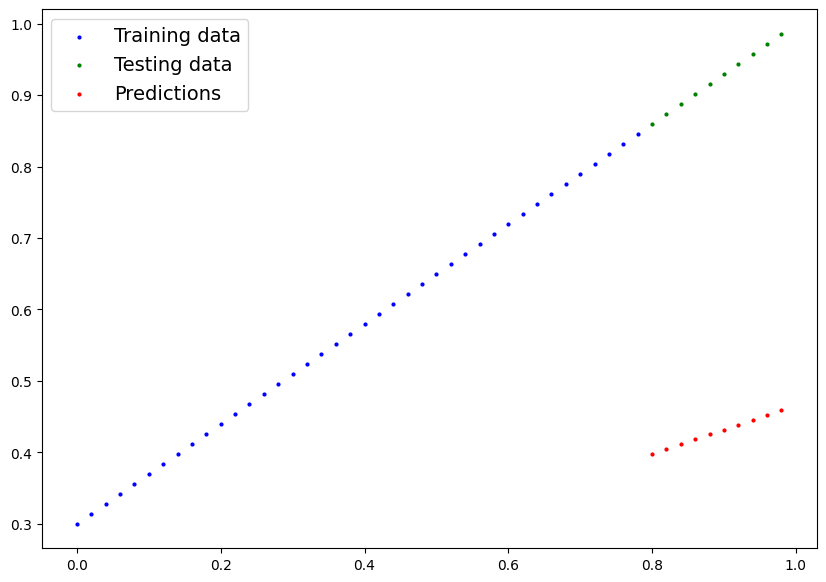

In [23]:
plot_predictions(predictions=y_preds)

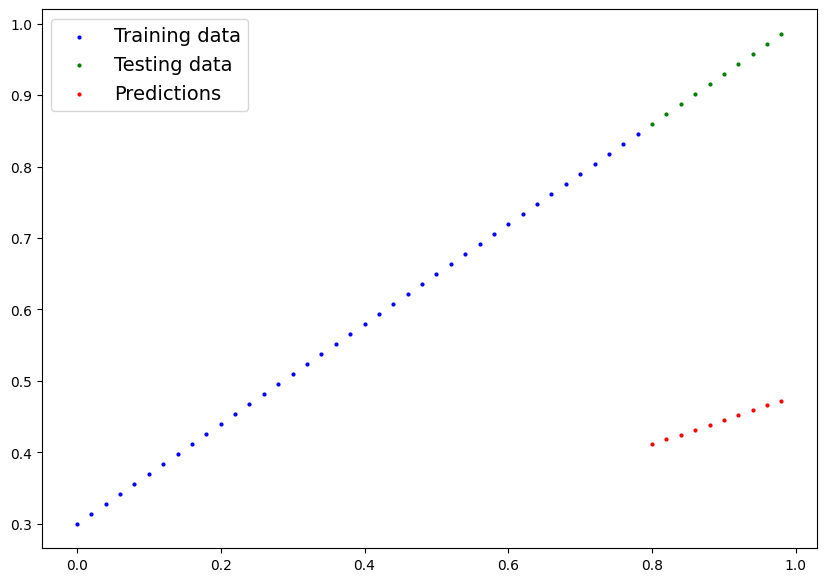

In [24]:
plot_predictions(predictions=y_preds_new)

# Changing the Epochs to a 100: to see how closer the predictions will get.

In [25]:
torch.manual_seed(42)

# Set the number of epochs (a hyperparameter)
# An Epoch is one loop through the data... (It is a hypeparameter as its been set)
epochs = 100

# loop through data
for epoch in range(epochs):
  #Set model to training mode
  model_0.train()    # Set model to training mode in PyTorch, require gradients


  # Forward pass: Perform forward pass in the training model
  y_pred = model_0(X_train)

  # Calculate the loss value (difference between model prediction and training values)
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad; Zero optimizer gradients, they accumulate by default
  optimizer.zero_grad()

  # Perform Backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # Step the optimizer (perform gradient descent) step the optimizer
  optimizer.step()  # optimizer changes through the loop

  # Testing
  model_0.eval() # Set model to evaluation mode in PyTorch, no gradients(turn off gradients tracking)

  # Print out model state_dict()
  print(f"\nEpoch: {epoch}\n----------")
  print(f"weight: {model_0.state_dict()['weights']}\nbias: {model_0.state_dict()['bias']}\nloss: {loss}")



Epoch: 0
----------
weight: tensor([0.3445])
bias: tensor([0.1488])
loss: 0.3013603389263153

Epoch: 1
----------
weight: tensor([0.3484])
bias: tensor([0.1588])
loss: 0.28983935713768005

Epoch: 2
----------
weight: tensor([0.3523])
bias: tensor([0.1688])
loss: 0.2783183455467224

Epoch: 3
----------
weight: tensor([0.3562])
bias: tensor([0.1788])
loss: 0.26679736375808716

Epoch: 4
----------
weight: tensor([0.3601])
bias: tensor([0.1888])
loss: 0.2552763521671295

Epoch: 5
----------
weight: tensor([0.3640])
bias: tensor([0.1988])
loss: 0.24375534057617188

Epoch: 6
----------
weight: tensor([0.3679])
bias: tensor([0.2088])
loss: 0.23223432898521423

Epoch: 7
----------
weight: tensor([0.3718])
bias: tensor([0.2188])
loss: 0.22071333229541779

Epoch: 8
----------
weight: tensor([0.3757])
bias: tensor([0.2288])
loss: 0.20919232070446014

Epoch: 9
----------
weight: tensor([0.3796])
bias: tensor([0.2388])
loss: 0.1976713240146637

Epoch: 10
----------
weight: tensor([0.3835])
bias: t

In [26]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  print(y_preds_new)

tensor([[0.8143],
        [0.8259],
        [0.8375],
        [0.8491],
        [0.8607],
        [0.8723],
        [0.8839],
        [0.8955],
        [0.9071],
        [0.9187]])


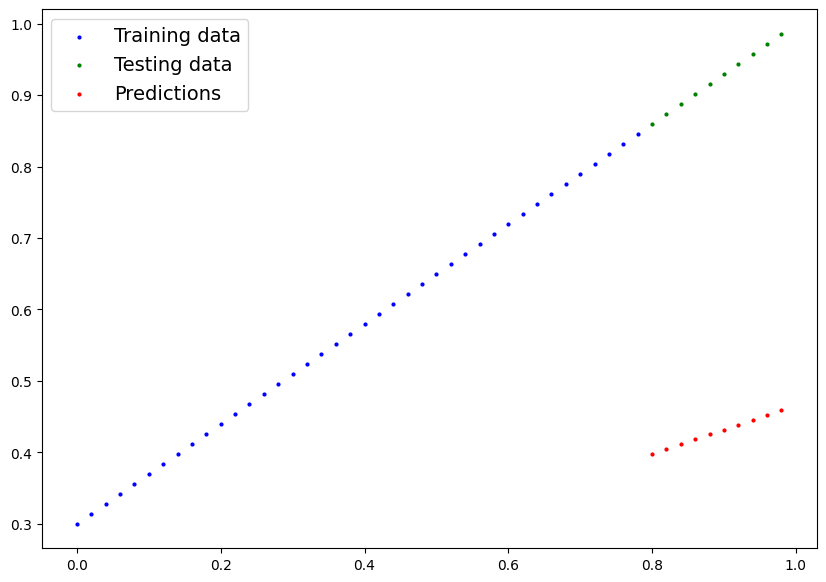

In [27]:
plot_predictions(predictions=y_preds)

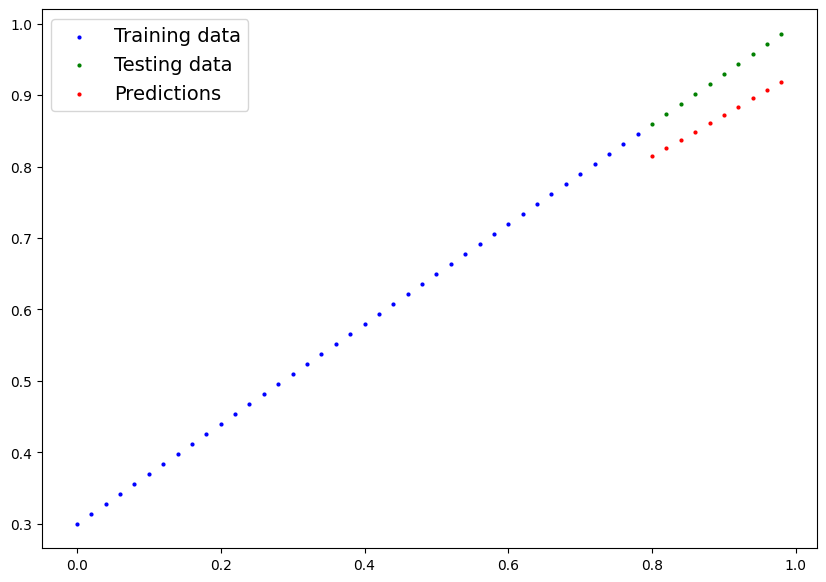

In [28]:
plot_predictions(predictions=y_preds_new)

In [36]:
# TESTING MODEL
model_0.eval() # Set model to evaluation mode in PyTorch, no gradients(turn off gradients tracking)

with torch.inference_mode(): # Turn off gradients tracking may also see torch.nograd.

# Do Forward pass
  test_pred = model_0(X_test)

# Calculate the loss
  test_loss = loss_fn(test_pred, y_test)

# Print out what's happening
if epoch % 10 == 0:
  print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

# Print out what's happening
#print(f"Test loss: {test_loss}")

# print out model state_dict()
print(model_0.state_dict())
# print(f"weight: {model_0.state_dict()['weights']}\nbias: {model_0.state_dict()['bias']}")

# y_preds = model_0(X_test)

OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])


In [39]:
# Align the red dots with the green dots

# Training

# Loop through the data
for epoch in range (epochs):

  # Set Model to training mode
  model_0.train()

  # Forward Pass
  y_pred = model_0(X_train)

  # Calculate Loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer Zero Grad
  optimizer.zero_grad()

  # Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # Step the optimizer (perform gradient descent) step the optimizer
  optimizer.step()

  # Testing
  model_0.eval() # Set model to evaluation mode in PyTorch, no gradients(turn off gradients tracking)

  with torch.inference_mode(): # Turn off gradients tracking may also see torch.nograd.

    # Do Forward pass
    test_pred = model_0(X_test)

  # Calculate the loss
  test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  # print out model state_dict()
  print(model_0.state_dict())

Epoch: 0 | Loss: 0.024110013619065285 | Test loss: 0.05536102131009102
OrderedDict([('weights', tensor([0.5818])), ('bias', tensor([0.3498]))])
OrderedDict([('weights', tensor([0.5834])), ('bias', tensor([0.3488]))])
OrderedDict([('weights', tensor([0.5852])), ('bias', tensor([0.3483]))])
OrderedDict([('weights', tensor([0.5868])), ('bias', tensor([0.3473]))])
OrderedDict([('weights', tensor([0.5886])), ('bias', tensor([0.3468]))])
OrderedDict([('weights', tensor([0.5902])), ('bias', tensor([0.3458]))])
OrderedDict([('weights', tensor([0.5920])), ('bias', tensor([0.3453]))])
OrderedDict([('weights', tensor([0.5938])), ('bias', tensor([0.3448]))])
OrderedDict([('weights', tensor([0.5954])), ('bias', tensor([0.3438]))])
OrderedDict([('weights', tensor([0.5972])), ('bias', tensor([0.3433]))])
Epoch: 10 | Loss: 0.020677709951996803 | Test loss: 0.04777535796165466
OrderedDict([('weights', tensor([0.5988])), ('bias', tensor([0.3423]))])
OrderedDict([('weights', tensor([0.6006])), ('bias', t

In [40]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  print(y_preds_new)

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])


In [41]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

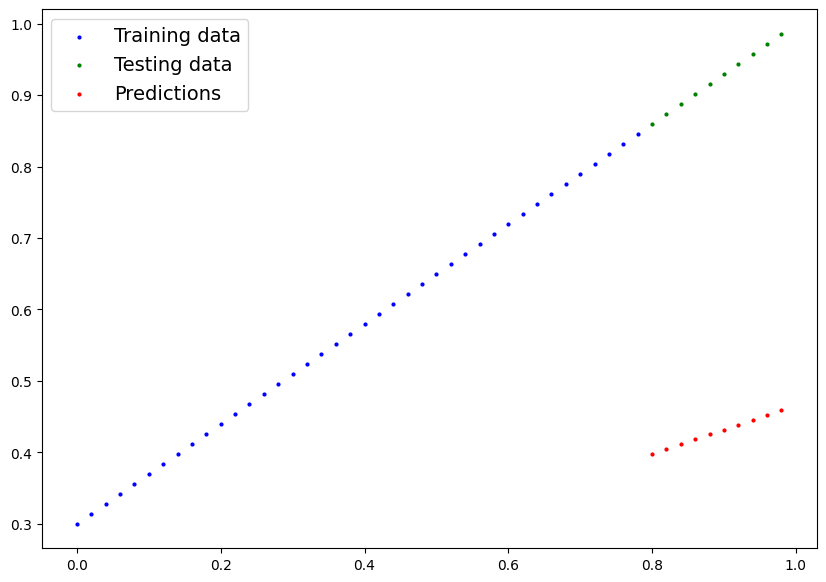

In [42]:
plot_predictions(predictions=y_preds);

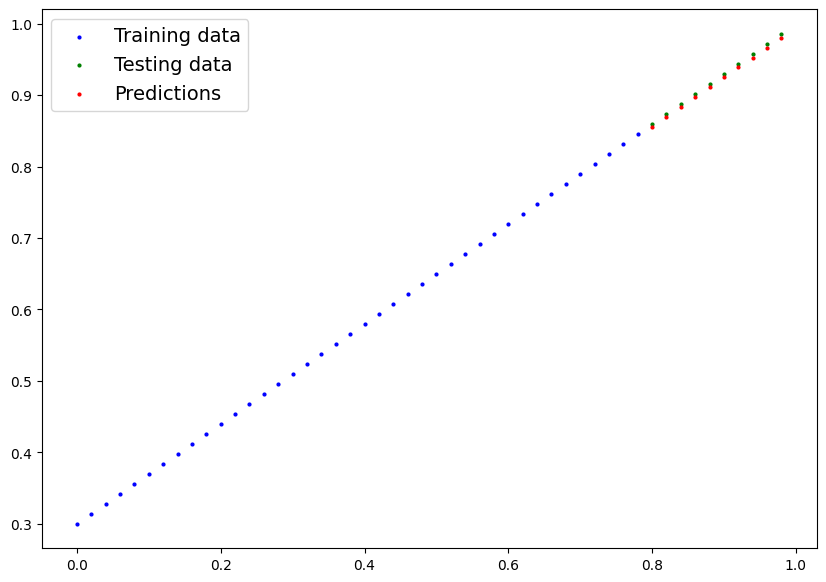

In [43]:
plot_predictions(predictions=y_preds_new);